### Analysis of Virome of dead pangolin individuals Metagenome

Blast hit analysis for NCBI accessions:
   
- SRA:SRP223042
- BioProject:PRJNA573298
- Sample: SAMN12809954

https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP223042

Dataset methods:

Liu P et al., "Viral Metagenomics Revealed Sendai Virus and Coronavirus Infection of Malayan Pangolins (Manis javanica).", Viruses, 2019 Oct 24;11(11)


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from Bio import SeqIO

In [2]:
DATA_PATH='../../'
PROJECT='MP789'
BLAST_OUT=DATA_PATH+PROJECT+'/Blastn/dataframes/'

### Read in data

Takes forematted csv file(s) generated in Blast_hit_file_formatter.ipynb as input 

In [3]:
df =pd.read_csv(BLAST_OUT+PROJECT+'_project_blast_hits.csv')
len(df)

9133

### Uniqe sequence hits

Get all unique sequence hits, short from most to least frequennt, then plot the frequency

Note all percentages calculated below for taxonomic analysis are based on a percentage of the hits.

In [4]:
titles=df.text_title.to_list()

In [5]:
seqs, counts = np.unique(titles, return_counts=True)

In [6]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

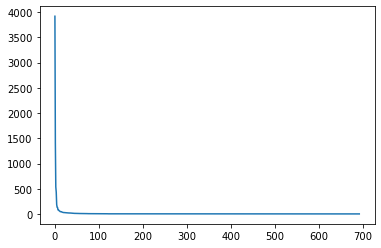

In [7]:
plt.plot(counts)

Most common ten frequencies

In [8]:
counts[:10]

(3919, 1404, 537, 433, 188, 133, 128, 81, 81, 70)

List all the unique sequence matches (in order from most to least common)

In [9]:
seqs

('PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA,',
 'PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA ,',
 'Danio rerio genome assembly, chromosome: 7,',
 'Mus musculus in vitro fertilized eggs cDNA, RIKEN full-length enriched library, clone:7420442G03 product:Warning: possibly chimeric clone, full insert sequence,',
 'Danio rerio genome assembly, chromosome 7 ,',
 'Linopodes sp. FP561 18S ribosomal RNA gene, partial sequence,',
 'Mus musculus in vitro fertilized eggs cDNA, RIKEN full-length enriched library, clone7420442G03 productWarning possibly chimeric clone, full insert sequence ,',
 'Myxobolus sp. 4 BWX-2019 small subunit ribosomal RNA gene, partial sequence,',
 'Hirundo smithii voucher B-39509 external transcribed spacer, partial sequence; 18S ribosomal RNA gene, complete sequence; and internal transcribed spacer 1, partial sequence,',
 'Tanypteryx sp. TS146 18S rRNA gene (partial), ITS1, 5.8S rRNA gene, ITS2 and 28S rRNA gene (partial), isolate T

For SAMN12809954, we see an incredible diversity of species as sequence hits to reads.

Percentage of Sunda Pangolin sequence matches for raw reads

In [11]:
sunda_pangolin = [x for x in titles if 'manis javanica' in x.lower()]
print(f'Sunda Pangolin sequence percentage: {((len(sunda_pangolin))/len(titles))*100}')

Sunda Pangolin sequence percentage: 0.3175298368553597


Percentage of human sequence matches in the raw reads

In [12]:
human = [x for x in titles if 'Human' in x]
homo_sapiens = [x for x in titles if 'Homo sapiens' in x]
print(f'Homo sapiens percentage: {((len(human)+len(homo_sapiens))/len(titles))*100}')

Homo sapiens percentage: 2.189860943830067


In [13]:
zebradanio = [x for x in titles if 'Danio rerio' in x]
print(f'Zebra fish percentage: {((len(zebradanio))/len(titles))*100}')

Zebra fish percentage: 8.57330559509471


In [14]:
mouse = [x for x in titles if 'Mus musculus' in x]
print(f'mouse percentage: {((len(mouse))/len(titles))*100}')

mouse percentage: 6.865214058907259


### Bat sequence content

Calculate percent of the following bat species and covs as percentage of the blast hits

In [15]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus', 'Pteropus']

In [16]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]
bat_pt = [x for x in titles if 'Pteropus' in x.lower()]

In [17]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)+len(bat_pt)
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 0.032847914157451


### Synthetic and BAC clones

In [18]:
synthetic=[x for x in titles if 'synthetic' in x.lower()]
bac=[x for x in titles if ' bac ' in x.lower()]

In [19]:
len(synthetic), synthetic

(39,
 ['Eukaryotic synthetic construct chromosome 19 ,',
  'Eukaryotic synthetic construct chromosome 15 ,',
  'Eukaryotic synthetic construct chromosome 22 ,',
  'Eukaryotic synthetic construct chromosome 21 ,',
  'Eukaryotic synthetic construct chromosome 16 ,',
  'Eukaryotic synthetic construct chromosome 22 ,',
  'Eukaryotic synthetic construct chromosome 18 ,',
  'Eukaryotic synthetic construct chromosome 16 ,',
  'Eukaryotic synthetic construct chromosome 22 ,',
  'Eukaryotic synthetic construct chromosome 17 ,',
  'Eukaryotic synthetic construct chromosome 22 >gi|1549098833|gb|CP034526.1| Eukaryotic synthetic construct chromosome 22,',
  'Eukaryotic synthetic construct chromosome 22 >gi|1549098833|gb|CP034526.1| Eukaryotic synthetic construct chromosome 22,',
  'Eukaryotic synthetic construct chromosome 17 >gi|1549096955|gb|CP034520.1| Eukaryotic synthetic construct chromosome 17,',
  'Eukaryotic synthetic construct chromosome 19,',
  'Eukaryotic synthetic construct chromosome 1

In [20]:
len(bac), bac

(13,
 ['Homo sapiens 3 BAC RP11-78H24 (Roswell Park Cancer Institute Human BAC Library) complete sequence ,',
  'Mus musculus BAC clone RP23-368D12 from chromosome 6, complete sequence ,',
  'Mus musculus 6 BAC RP23-233J7 (Roswell Park Cancer Institute (C57BL/6J Female) Mouse BAC Library) complete sequence ,',
  'AC018683 Homo sapiens BAC clone RP11-423P14 from 4, complete sequence ,',
  'Mus musculus BAC clone RP23-368D12 from chromosome 6, complete sequence ,',
  'Mus musculus BAC clone RP23-368D12 from chromosome 6, complete sequence,',
  'Homo sapiens 12 BAC RP11-153M3 (Roswell Park Cancer Institute Human BAC Library) complete sequence,',
  'Homo sapiens 3 BAC RP11-78H24 (Roswell Park Cancer Institute Human BAC Library) complete sequence,',
  'Homo sapiens BAC clone RP11-547I5 from 2, complete sequence,',
  'Homo sapiens BAC clone RP11-280J8 from 4, complete sequence,',
  'Homo sapiens BAC clone CH17-336L6 from chromosome 3, complete sequence,',
  'Mus musculus BAC clone RP23-368D1